### First let's import some libraries and get some public data

#### Imports

In [1]:
import numpy as np
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt
#%matplotlib notebook

#### Fetch S&P500 ETF market data

In [2]:
sp = web.DataReader('SPY', 'yahoo', start='1990-01-01')

In [3]:
sp.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,28.165877
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,28.366203
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,28.426269
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,28.726791
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,28.846986


#### Now let's add some computed information

In [4]:
#adding '_' to facilitate handling the column
sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Adj_Close/sp.Adj_Close.shift()-1        #simple returns
sp['l_r'] = np.log(sp.Adj_Close/sp.Adj_Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
2016-10-24,215.000000,215.320007,214.479996,214.889999,60146600,214.889999,0.004253,0.004244
2016-10-25,214.679993,214.979996,213.979996,214.169998,66542300,214.169998,-0.003351,-0.003356
2016-10-26,213.210007,214.419998,212.929993,213.740005,75705500,213.740005,-0.002008,-0.002010
2016-10-27,214.580002,214.619995,213.080002,213.169998,77220200,213.169998,-0.002667,-0.002670
2016-10-28,213.139999,213.929993,211.710007,212.539993,137514400,212.539993,-0.002955,-0.002960


#### Now let's plot the histogram of the SPY *log returns*. It tends to a normal distribution.

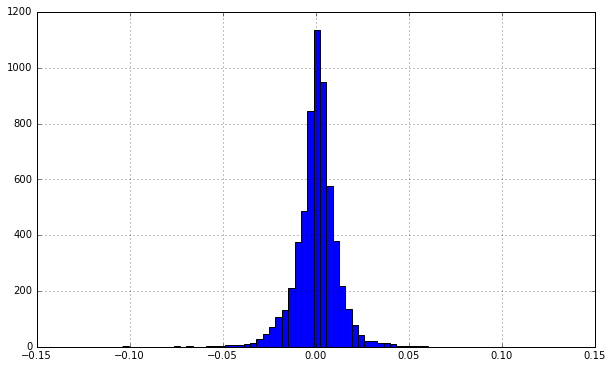

In [5]:
sp.l_r.hist(bins=70, figsize=(10,6))

#### Now let's get to Benford

In [6]:
import benford as bf

##### The classes First, Second and LastTwo represent the Benfords's Expected proportions for the first, second and last two digits. Note that First may be applied to the first one, first two and first three digits by changing the 'digs' parameter. Plotting the expected proportions is True by default, but may be supressed if one only wants to use the resulting DataFrame.

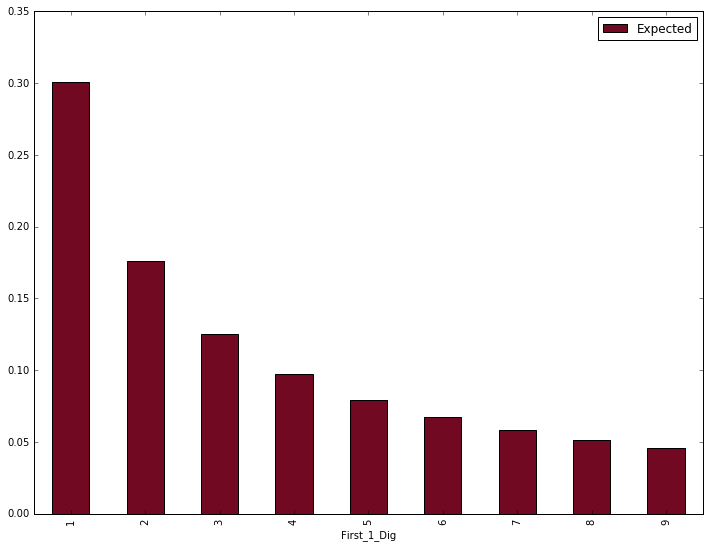

In [7]:
f1d = bf.First(1)

In [8]:
f1d

,Expected
First_1_Dig,
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


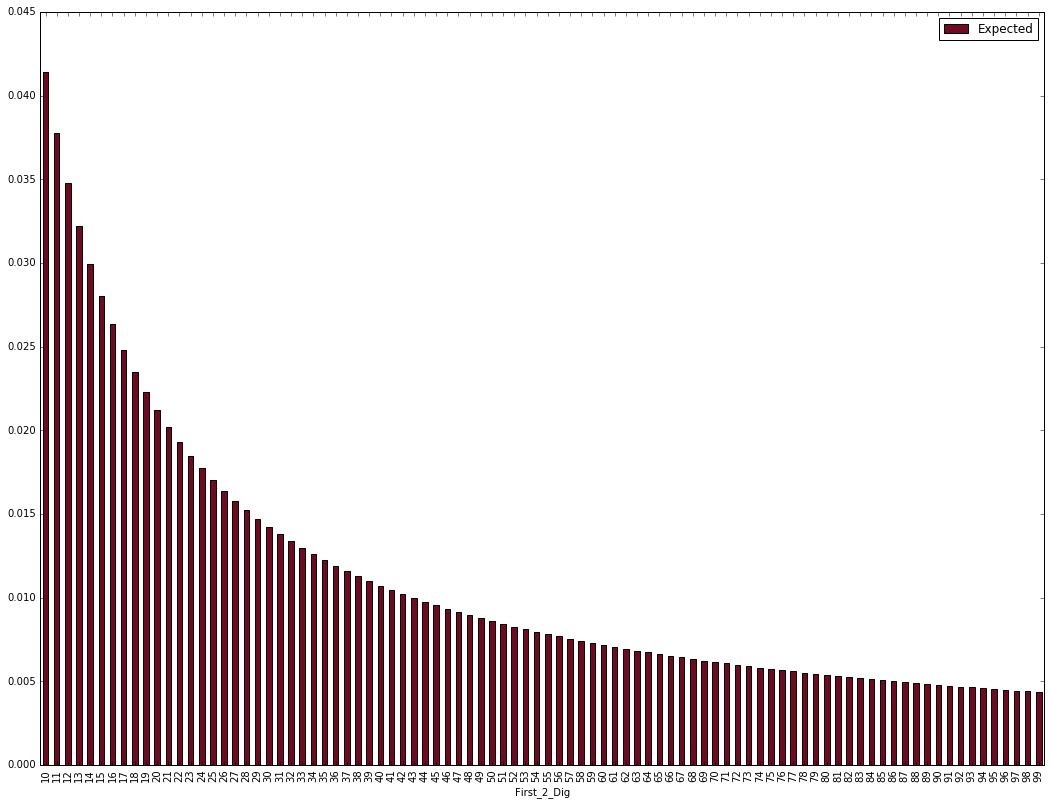

In [9]:
f2d = bf.First(2)

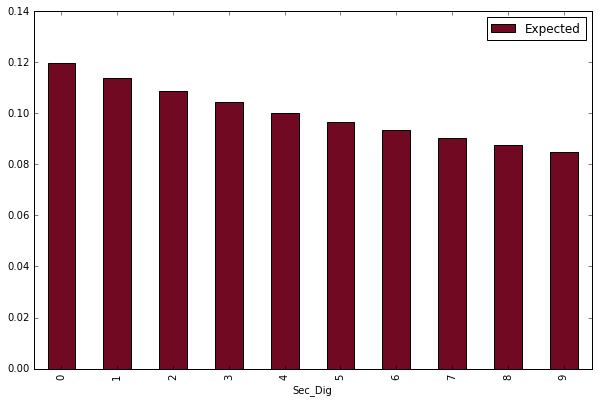

In [10]:
sd = bf.Second() #note decrease in steapness

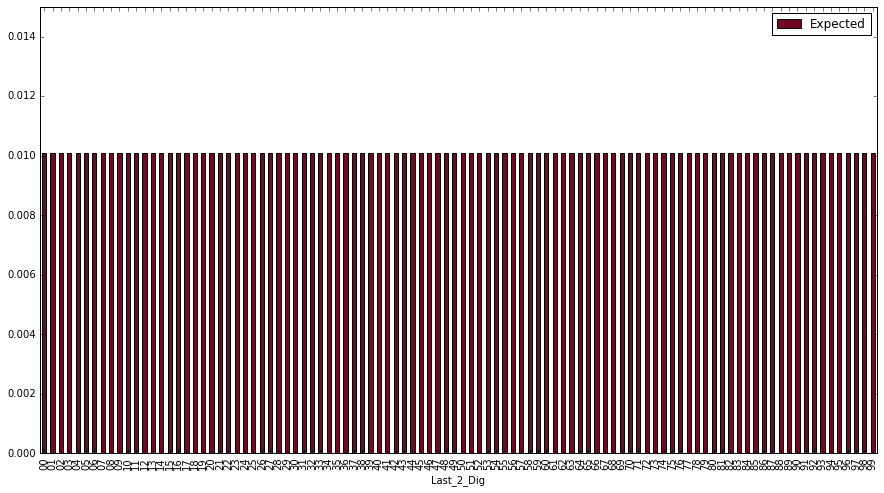

In [11]:
l2d = bf.LastTwo()

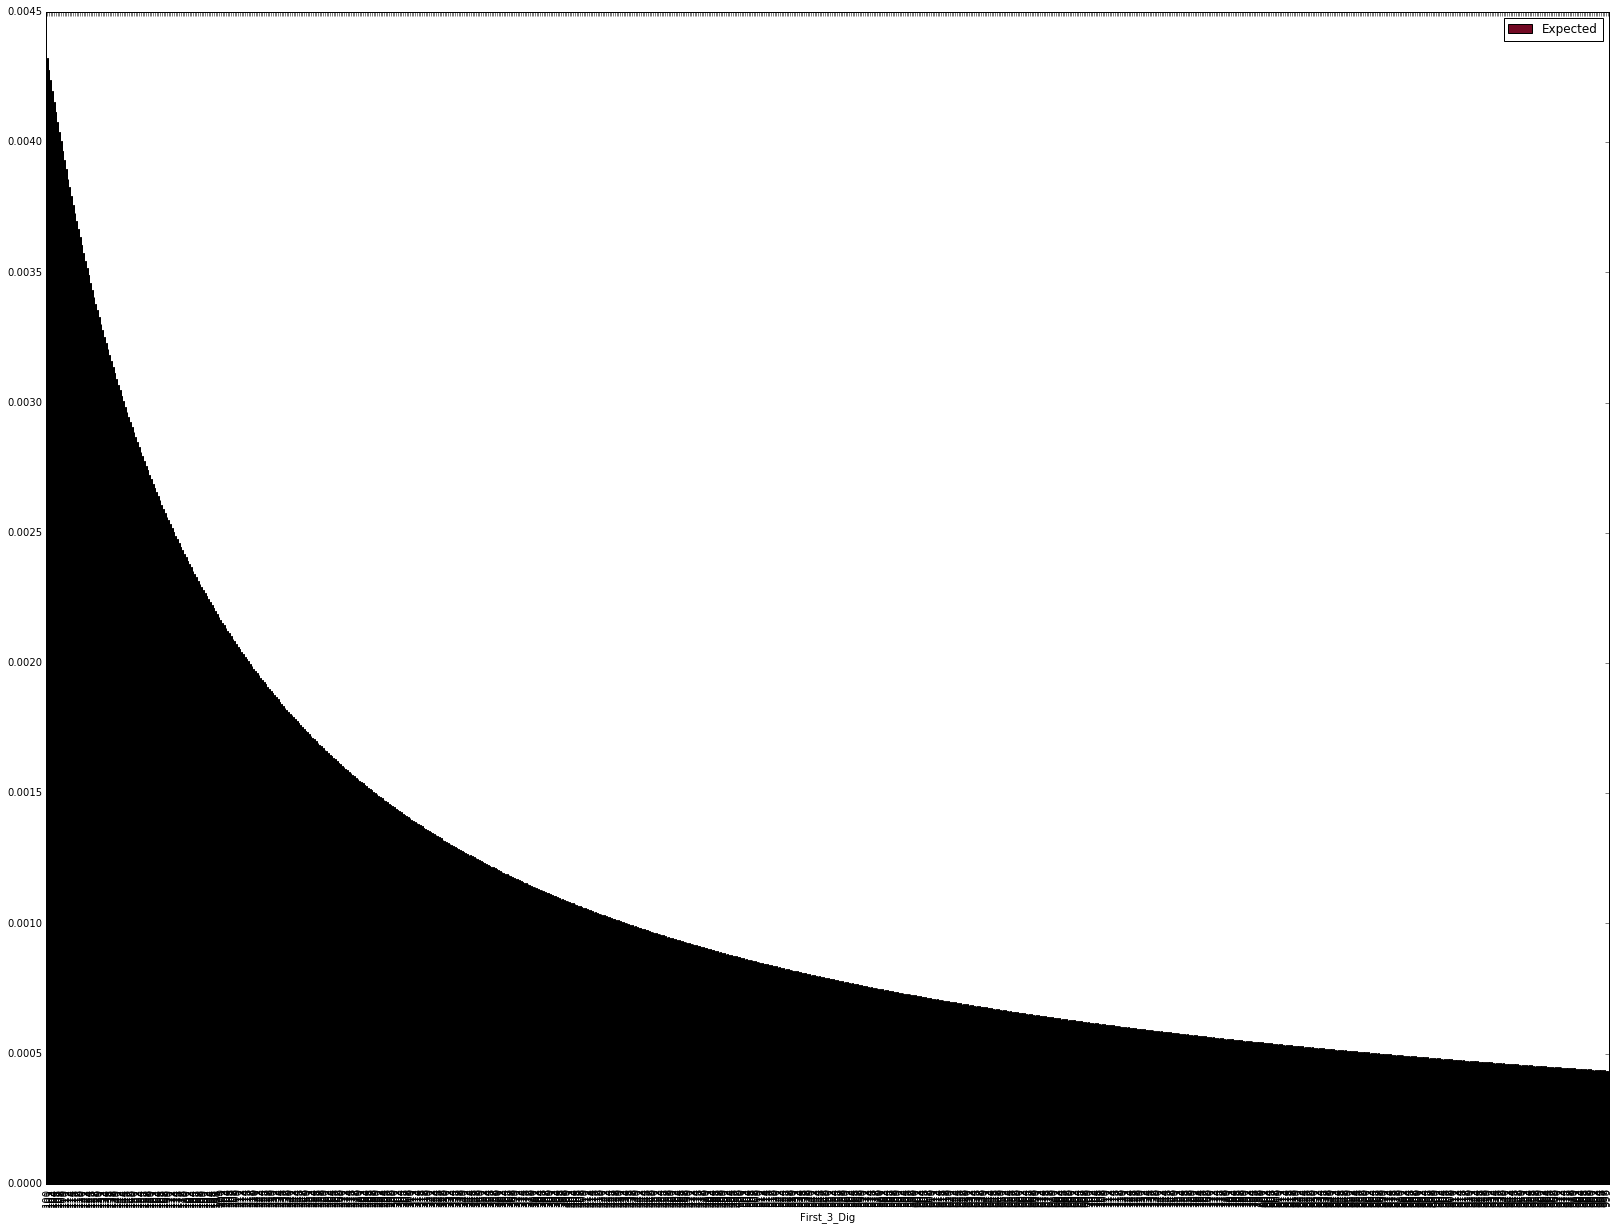

In [12]:
f2d = bf.First(3)

### Now to real usage
##### Benford's Analysis is the study of a series of numbers through the recording of digits position and comparing the digits proportion in the series with Benford's expected didstributions.

##### The main class in the Benford module is 'Analysis'. It takes a sequence of numbers and creates a pandas DataFrame with columns that refer to the digits and their position in each number.

In [13]:
a = bf.Analysis(abs(sp.l_r), dec=8)  # used absolute values of SPY log returns
a.head(10)

Initialized sequence with 5982 registries.


,Seq,ZN,F1D,SD,F2D,F3D,L2D
Date,,,,,,,
1993-02-01,0.007087,708719,7,0,70,708,19
1993-02-02,0.002115,211528,2,1,21,211,28
1993-02-03,0.010516,1051648,1,0,10,105,48
1993-02-04,0.004175,417534,4,1,41,417,34
1993-02-05,0.000696,69577,6,9,69,695,77
1993-02-08,0.000000,0,0,0,0,0,0
1993-02-09,0.006974,697352,6,9,69,697,52
1993-02-10,0.001399,139859,1,3,13,139,59
1993-02-11,0.004881,488086,4,8,48,488,86


In [14]:
z =np.log10(sp.l_r[sp.l_r!=0]).min()
z

-4.3374801760497723

In [ ]:
int(4-z)

In [ ]:
sp[sp.columns[(sp !=0.0).any()]]

In [ ]:
plt.style.use('ggplot')


---Test performed on 5982 registries.---


The entries with the significant deviations are:

             Expected     Found    Z_test
First_2_Dig                              
67           0.006434  0.010364  3.721111
10           0.041393  0.050150  3.367981
13           0.032185  0.039452  3.147992
15           0.028029  0.021230  3.146493
24           0.017729  0.012370  3.091499
66           0.006531  0.009696  2.958659

The Mean Absolute Deviation is 0.00139600928656
    For the First Two Digits:
    - 0.0000 to 0.0012: Close Conformity
    - 0.0012 to 0.0018: Acceptable Conformity
    - 0.0018 to 0.0022: Marginally Acceptable Conformity
    - Above 0.0022: Nonconformity


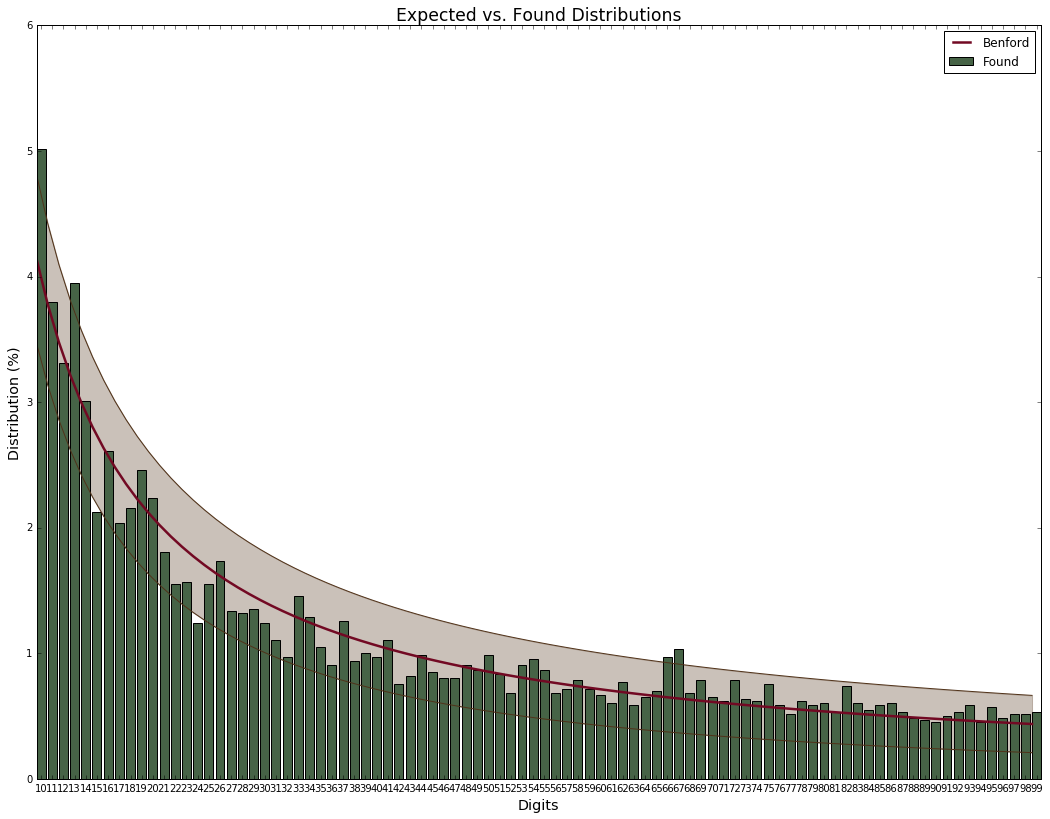

In [19]:
a.first_digits(2,conf_level=99, show_high_Z='all')#, limit_N=2500)

In [ ]:
f1d

In [ ]:
fa

In [ ]:
a.first_digits(2, show_high_Z='all', conf_level=99)

In [22]:
a.first_digits(3, conf_level=95, show_high_Z=2)


---Test performed on 5982 registries.---


The entries with the top 2 Z scores are:

             Expected     Found    Z_test
First_3_Dig                              
952          0.000456  0.001672  4.101708
962          0.000451  0.001505  3.531614

The Mean Absolute Deviation is 0.000345225144015
    For the First Three Digits:
    - 0.0000 to 0.00036: Close Conformity
    - 0.00036 to 0.00044: Acceptable Conformity
    - 0.00044 to 0.00050: Marginally Acceptable Conformity
    - Above 0.00050: Nonconformity


In [26]:
a.second_digit(conf_level=99, show_high_Z='all')#, limit_N=2500)


---Test performed on 5982 registries.---


The entries with the significant deviations are:

         Expected     Found    Z_test
Sec_Dig                              
0        0.119679  0.137747  4.285217

The Mean Absolute Deviation is 0.00558199118986
    For the Second Digits:
    - 0.000 to 0.008: Close Conformity
    - 0.008 to 0.010: Acceptable Conformity
    - 0.010 to 0.012: Marginally Acceptable Conformity
    - Above 0.012: Nonconformity
